In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston



In [2]:
boston_data = load_boston()

In [3]:
dir(boston_data) #No of attributes

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
data = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)  


In [6]:
data['PRICE']=boston_data.target

In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


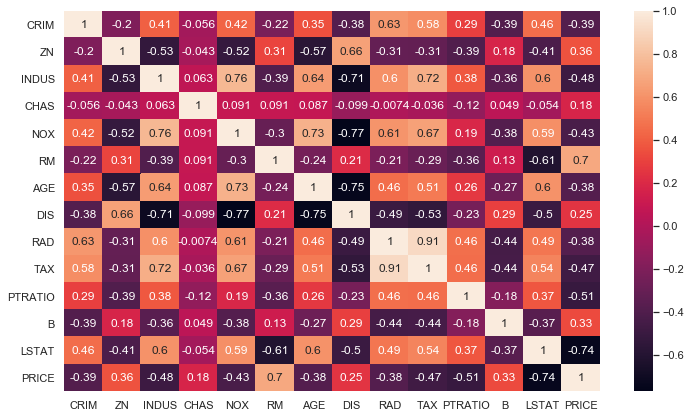

In [9]:
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(data.corr(),annot=True)

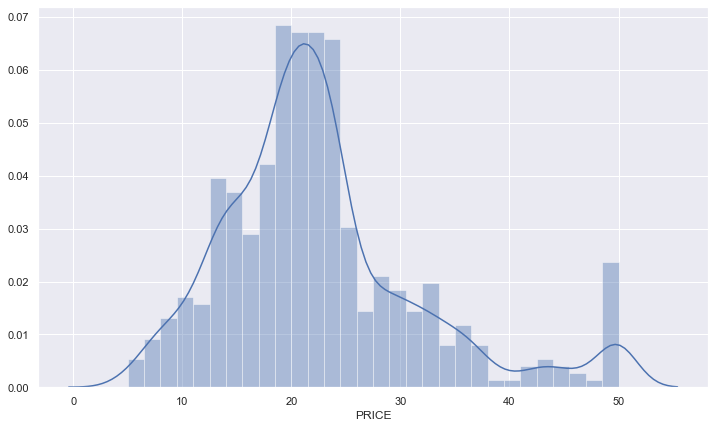

In [10]:
sns.distplot(data['PRICE'],bins=30)

In [11]:
X = data.drop('PRICE',axis=1)
y=data['PRICE']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
model.intercept_

30.246750993923314

In [17]:
coeff=model.coef_
coeff_data= pd.DataFrame(coeff,index=X_train.columns,columns=['COEFF'])
coeff_data

,COEFF
CRIM,-0.113056
ZN,0.030110
INDUS,0.040381
CHAS,2.784438
NOX,-17.202633
RM,4.438835
AGE,-0.006296
DIS,-1.447865
RAD,0.262430
TAX,-0.010647


In [18]:
#DATA TRANSFORMATION
data['PRICE'].skew()
y_log=np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

skew: -0.33032129530987864


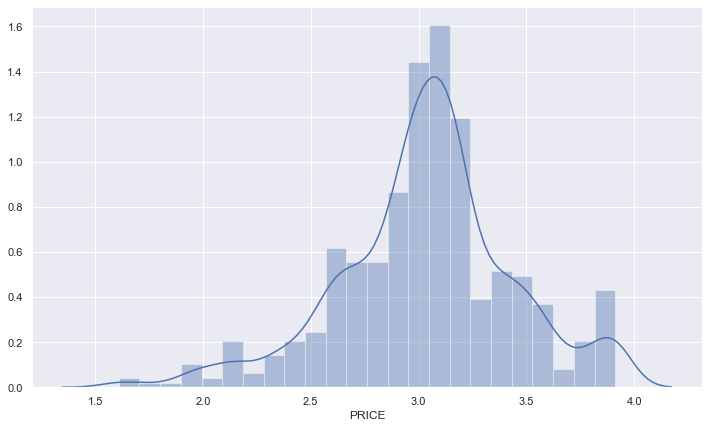

In [19]:
print(f'skew: {y_log.skew()}')
sns.distplot(y_log)

### Regression using log prices


In [20]:

X= data.drop('PRICE',axis=1)
y=y_log


In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [22]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
coeff=model.coef_
coeff_data= pd.DataFrame(coeff,index=X_train.columns,columns=['COEFF'])
coeff_data

,COEFF
CRIM,-0.009679
ZN,0.000757
INDUS,0.003057
CHAS,0.096207
NOX,-0.727261
RM,0.113095
AGE,-0.000139
DIS,-0.048944
RAD,0.011139
TAX,-0.000505


In [24]:
coeff_data['COEFF'].apply(lambda x: np.e**x)

CRIM       0.990368
ZN         1.000757
INDUS      1.003062
CHAS       1.100987
NOX        0.483231
RM         1.119738
AGE        0.999861
DIS        0.952235
RAD        1.011201
TAX        0.999495
PTRATIO    0.963687
B          1.000580
LSTAT      0.972076
Name: COEFF, dtype: float64

In [25]:
# P value and evaluating coeffecients 
import statsmodels.api as sm

X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
results = est.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     116.9
Date:                Tue, 11 Feb 2020   Prob (F-statistic):          1.35e-125
Time:                        16:01:50   Log-Likelihood:                 106.78
No. Observations:                 404   AIC:                            -185.6
Df Residuals:                     390   BIC:                            -129.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8409      0.227     16.943      0.0

In [26]:
pvalue = pd.DataFrame({'coef':results.params, 'p_value':round(results.pvalues,3)})
pvalue  #pavalue < 0.05 then variable is significant

,coef,p_value
const,3.840920,0.000
CRIM,-0.009679,0.000
ZN,0.000757,0.237
INDUS,0.003057,0.256
CHAS,0.096207,0.012
NOX,-0.727261,0.000
RM,0.113095,0.000
AGE,-0.000139,0.812
DIS,-0.048944,0.000
RAD,0.011139,0.000


In [27]:
# testing for multicollinearity  (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif =[]
for i in range(X2.shape[1]):
    vif.append(variance_inflation_factor(exog=X2.values,exog_idx=i))


In [28]:
pvalue['VIF']=vif

In [29]:
pvalue # VIF < 10 so no need to worry about multicollinearity

,coef,p_value,VIF
const,3.840920,0.000,580.747263
CRIM,-0.009679,0.000,1.713187
ZN,0.000757,0.237,2.465631
INDUS,0.003057,0.256,3.877855
CHAS,0.096207,0.012,1.096674
NOX,-0.727261,0.000,4.469150
RM,0.113095,0.000,1.947809
AGE,-0.000139,0.812,2.989948
DIS,-0.048944,0.000,4.168578
RAD,0.011139,0.000,7.658316


## MODEL SIMPLIFICATION & BIC (Choosing best model) Baysian Information Criterion

In [30]:
# Original model with log prices and all features
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
results = est.fit()
original_coef = pd.DataFrame({'coef':results.params, 'p_value':round(results.pvalues,3)})
#printing BIC value & Rsquared
print(f'bic : {results.bic}')
print(f'Rsquared : {results.rsquared}')

##Reducing model with exluding INDUS

X2 = X2.drop(['INDUS'],axis=1)
est = sm.OLS(y_train, X2)
results = est.fit()
reduced_INDUS_coef = pd.DataFrame({'coef':results.params, 'p_value':round(results.pvalues,3)})
print("     ")
print(f'bic of reduced model excluding INDUS: {results.bic}')
print(f'Rsquared of reduced model : {results.rsquared}')

##Reducing model with exluding INDUS & AGE coef
X2 = X2.drop(['AGE'],axis=1)
est = sm.OLS(y_train, X2)
results = est.fit()
reduced_AGE_coef = pd.DataFrame({'coef':results.params, 'p_value':round(results.pvalues,3)})
print("     ")
print(f'bic of reduced model excluding AGE AND INDUS: {results.bic}')
print(f'Rsquared of reduced model : {results.rsquared}')

bic : -129.53438883693264
Rsquared : 0.7957149231758658
     
bic of reduced model excluding INDUS: -134.20023023222376
Rsquared of reduced model : 0.7950384647288367
     
bic of reduced model excluding AGE AND INDUS: -140.1578914346571
Rsquared of reduced model : 0.7950162659512618


In [31]:
frames=[original_coef,reduced_INDUS_coef,reduced_AGE_coef]
# COMPARE COEFF Changes in 3 Models
pd.concat(frames,axis=1)

,coef,p_value,coef,p_value,coef,p_value
const,3.840920,0.000,3.836033,0.000,3.838936,0.000
CRIM,-0.009679,0.000,-0.009711,0.000,-0.009719,0.000
ZN,0.000757,0.237,0.000669,0.292,0.000681,0.280
INDUS,0.003057,0.256,NaN,NaN,NaN,NaN
CHAS,0.096207,0.012,0.100668,0.008,0.100426,0.008
NOX,-0.727261,0.000,-0.675162,0.000,-0.683748,0.000
RM,0.113095,0.000,0.110276,0.000,0.109504,0.000
AGE,-0.000139,0.812,-0.000120,0.837,NaN,NaN
DIS,-0.048944,0.000,-0.050712,0.000,-0.050109,0.000
RAD,0.011139,0.000,0.010318,0.001,0.010364,0.000


## Residuals & Residual Plots

In [32]:
# MODIFIED MODEL TRANSFORMED USING LOG PRICES & SIMPLIFIED(DROPPING TWO FEATURES)
X= data.drop(['PRICE','INDUS','AGE'],axis=1)
y=y_log
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

# USING STATS MODEL
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
results = est.fit()

#Residuals
# results.resid
#Graph actual vs predicted prices
corr=round(y_train.corr(results.fittedvalues),2)
corr

0.89

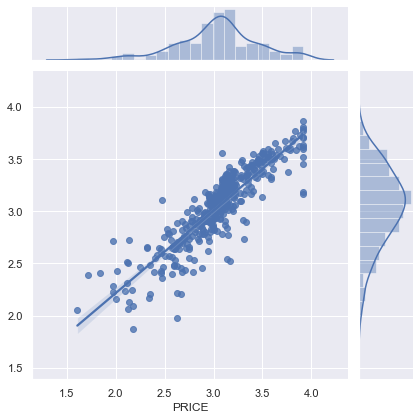

In [33]:
sns.jointplot(y_train,results.fittedvalues,kind='reg')

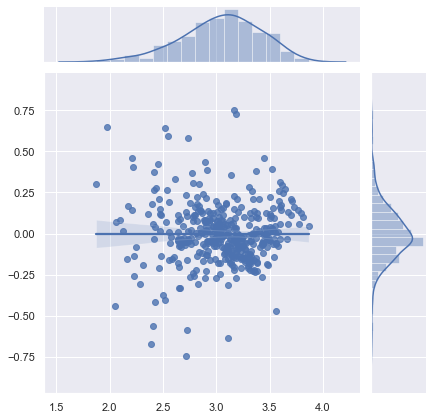

In [34]:
#residuals vs predicted values
sns.jointplot(results.fittedvalues,results.resid,kind='reg')


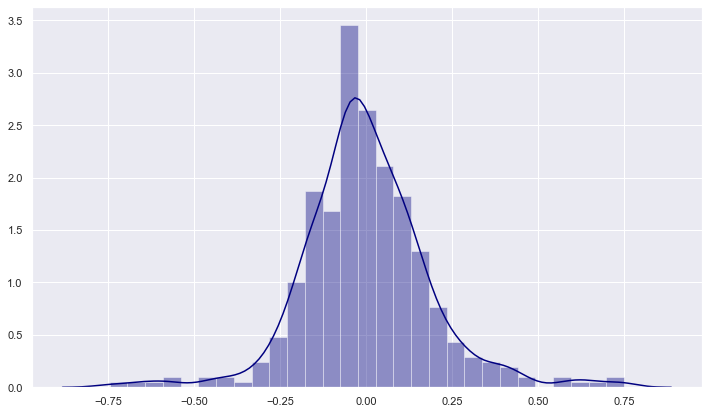

In [35]:
# Distribution of Residuals (log prices) - checking the normality

resid_mean = round(results.resid.mean(),3)
resid_skew = round(results.resid.skew(),3)
sns.distplot(results.resid,color='navy')

## VALUATION TOOL

In [36]:
from sklearn.metrics import mean_squared_error
features= data.drop(['INDUS','AGE','PRICE'],axis=1)

log_prices= np.log(data['PRICE'])
target = pd.DataFrame(log_prices,columns=['PRICE'])
target.shape
features

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48


In [57]:
# we'll predict using this single property data (by mean of old data)


CRIME_IDX=0
ZN_IDX=1
CHAS_IDX=2
RM_IDX=4
PTRATIO_IDX= 8


property_stats= np.ndarray(shape=(1,11))
property_stats=features.mean().values.reshape(1,11)
property_stats

array([[3.61352356e+00, 1.13636364e+01, 6.91699605e-02, 5.54695059e-01,
        6.28463439e+00, 3.79504269e+00, 9.54940711e+00, 4.08237154e+02,
        1.84555336e+01, 3.56674032e+02, 1.26530632e+01]])

In [37]:
model = LinearRegression().fit(features, target)


In [38]:
fitted_vals= model.predict(features)

In [40]:
MSE = mean_squared_error(target,fitted_vals)
MSE

0.03516080084618688

In [42]:
RMSE = np.sqrt(MSE)
RMSE

0.18751213519713034

In [89]:
# House price basic Estimate
def get_log_estimate(nr_rooms, students_per_classroom,next_to_river=False,high_confidence=True):
    property_stats[0][RM_IDX]= nr_rooms
    property_stats[0][PTRATIO_IDX]= students_per_classroom
    
    if next_to_river:
        property_stats[0][CHAS_IDX]=1
    else:
        property_stats[0][CHAS_IDX]=0
    
    # MAKE PREDICTION
    log_estimate= model.predict(property_stats)
    
    #Cals Range
    if high_confidence:
        upper_bound = log_estimate + 2*RMSE
        lower_bound = log_estimate - 2*RMSE
        interval = 95
    else:
        upper_bound = log_estimate + RMSE
        lower_bound = log_estimate - RMSE
        interval = 68
        
    return log_estimate,upper_bound,lower_bound,interval


In [90]:
print(f' Estimate price : ${(get_log_estimate(3,20,next_to_river=True)[0][0])*1000}')

 Estimate price : $[2776.75819148]


In [92]:
# 1970 median property price in Boston
data['PRICE'].median()

21.2

In [137]:
round(np.e**upper_bound[0][0]*1000*SCALE_FACTOR,-3)

827000.0

In [161]:
def get_dollar_estimate(rooms,PTratio,River=False,Conf=False):
    """ESTIMATE PRICE OF PROPERTY IN BOSTON
        rooms = no. of rooms
        PTratio = no. of students per teacher in classroom 
        River= True/False , next to river or not
        Confidence = more large range (True/False)
    
    """
    
    
    if rooms<1 or PTratio<1:
        print("This is unrealistic. Try again")
    else:
        #today median property price in Boston
        ZILLOW_MEDIAN_PRICE = 583.3
        SCALE_FACTOR = ZILLOW_MEDIAN_PRICE/data['PRICE'].median()
        log_estimate,upper_bound,lower_bound,interval = get_log_estimate(rooms,PTratio,next_to_river=River, high_confidence= Conf)

        #Convert to today's dollars

        dollar_est= np.e**log_estimate[0][0]*1000*SCALE_FACTOR
        dollar_upper= np.e**upper_bound[0][0] *1000*SCALE_FACTOR
        dollar_lower= np.e**lower_bound[0][0] *1000*SCALE_FACTOR
        confidence = interval 

        #Rounding the values
        dollar_est=round(dollar_est,-3)
        dollar_upper=round(dollar_upper,-3)
        dollar_lower=round(dollar_lower,-3)

        print(f'The estimated property value is ${dollar_est}')
        print(f'At {confidence}%, the valuation range is ')
        print(f'${dollar_lower} at lower end to ${dollar_upper}')


In [162]:
get_dollar_estimate(3,20,True,False)

The estimated property value is $442000.0
At 68%, the valuation range is 
$366000.0 at lower end to $533000.0
